In [1]:
!pip install -U albumentations
!pip install opencv-python
!pip install torchvision

In [8]:
import os
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [9]:
# Define paths to the image and annotation directories
image_dir = "./sea-turtles-1-test/all/images/"
annotation_dir = "./sea-turtles-1-test/all/labels/"

In [10]:
# Define the transformation pipeline including image and bounding box augmentations
transform = A.Compose([
    A.HorizontalFlip(p=0.3),
    A.Rotate(p=0.3, limit=30),
    A.RandomBrightnessContrast(p=0.3),
    #A.Normalize(),
    #ToTensorV2(),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'], min_visibility=0.1))

In [6]:
# Get the list of image files
image_files = os.listdir(image_dir)

In [11]:
# Iterate through each image
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load the corresponding annotation file if it exists
    annotation_file = os.path.join(annotation_dir, image_file.replace('.jpg', '.txt'))
    if os.path.exists(annotation_file) and os.path.getsize(annotation_file) > 0:
        with open(annotation_file, 'r') as f:
            # Read all values from the annotation line
            annotation_values = [float(coord) for coord in f.readline().strip().split()]

        # Determine the number of values in the annotation line
        num_values = len(annotation_values)
        print(f"Turtles {num_values} -> {annotation_values}")

        # Extract the bounding box coordinates based on the number of values
        if num_values == 5:
            lab, x_center, y_center, width, height = annotation_values
            print(f"Valid annotation format for {image_file}. OK.")
        else:
            print(f"Invalid annotation format for {image_file}. Skipping.")
            continue

        # Apply the augmentation to the image and bounding box
        augmented = transform(image=image, bboxes=[[x_center, y_center, width, height]], class_labels=[0])

        # Extract the augmented image and bounding box
        augmented_image = augmented['image']
        augmented_bbox = augmented['bboxes'][0]

        # Update the annotation file with the new bounding box coordinates
        with open(annotation_file, 'w') as f:
            f.write(f"{augmented_bbox[0]} {augmented_bbox[1]} {augmented_bbox[2]} {augmented_bbox[3]}")

        # Save the augmented image
        augmented_image_path = os.path.join("./sea-turtles-1-test/all/augmented_images/", image_file)
        cv2.imwrite(augmented_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
    else:
        print(f"No annotation found for {image_file}. Skipping.")

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [19]:
import albumentations as A
import cv2
import os

# Define the augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(p=0.5, limit=90),
    A.RandomBrightness(p=0.5, limit=0.2),
    A.RandomContrast(p=0.5, limit=0.2),
    A.RandomGamma(p=0.5, gamma_limit=(0.8, 1.2)),
])

# Define the colors for the bounding boxes
colors = ['b', 'g', 'r', 'c', 'm']

# Load the image data
image_dir = "./sea-turtles-1-test/all/images/"
label_dir = "./sea-turtles-1-test/all/labels/"
image_files = os.listdir(image_dir)

import cv2

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)

    # Apply augmentation to the image
    augmented_image = transform(image=image)["image"]

    # Create a new filename for the augmented image
    new_image_filename = image_file.split(".")[0] + "_augmented.jpg"

    # Save the augmented image
    cv2.imwrite(os.path.join(image_dir, new_image_filename), augmented_image)

    # Load the corresponding label file
    label_file = image_file.replace(".jpg", ".txt")
    label_path = os.path.join(label_dir, label_file)
    with open(label_path, "r") as f:
        labels = f.read().splitlines()

    # Convert the labels from strings to lists of integers
    for i in range(len(labels)):
        new_label = []
        for label in labels[i].split():
            if isinstance(label, str):
                try:
                    new_label.append(int(label))
                except ValueError:
                    # Handle non-integer values
                    pass
            else:
                new_label.append(label)
        labels[i] = new_label

    # Draw a bounding box around each object in the augmented image
    for j, label in enumerate(labels):
        bb, x_min, y_min, x_max, y_max = label
        pt1 = (x_min, y_min)
        pt2 = (x_max, y_max)
        cv2.rectangle(augmented_image, pt1, pt2, colors[j % len(colors)], 2)

    # Create a new label file for the augmented image
    new_label_filename = label_file.split(".")[0] + "_augmented.txt"
    new_label_path = os.path.join(label_dir, new_label_filename)

    # Write the augmented labels to the new file
    with open(new_label_path, "w") as f:
        for label in labels:
            for value in label:
                f.write(str(value) + " ")
            f.write("\n")



ValueError: not enough values to unpack (expected 5, got 1)

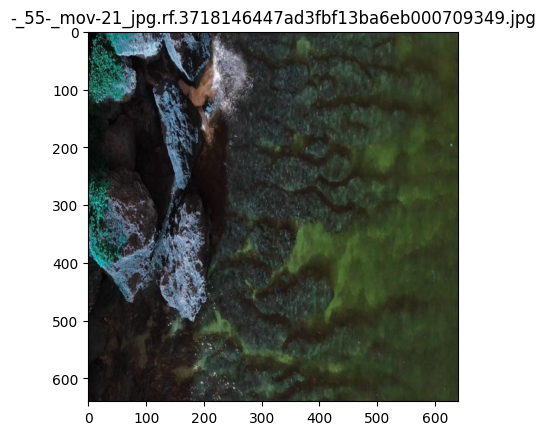

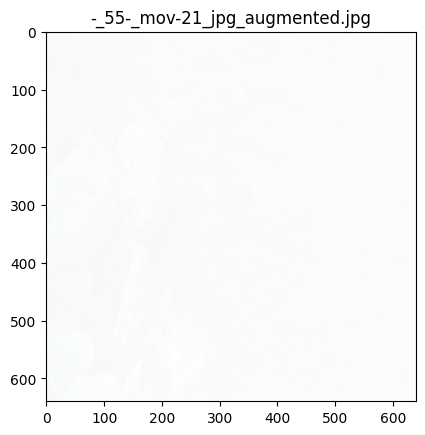

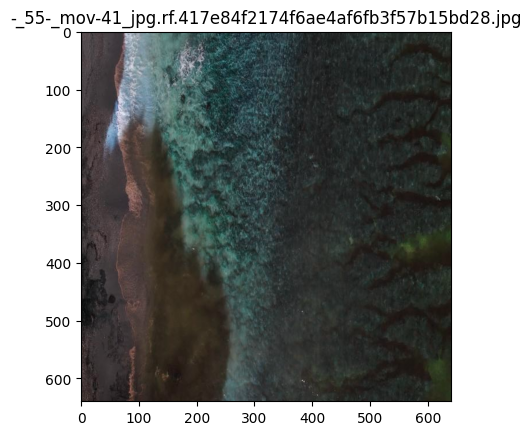

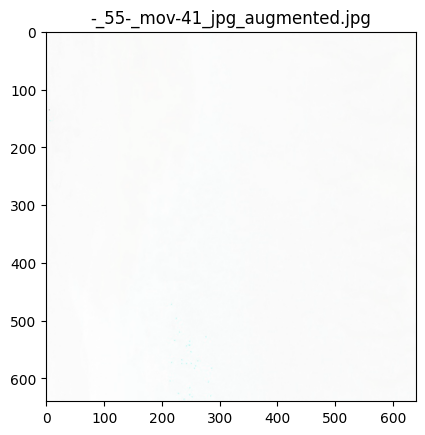

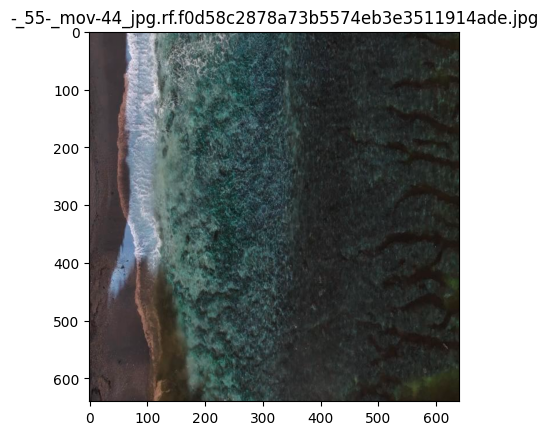

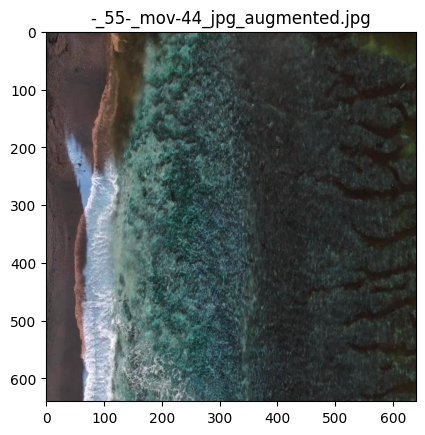

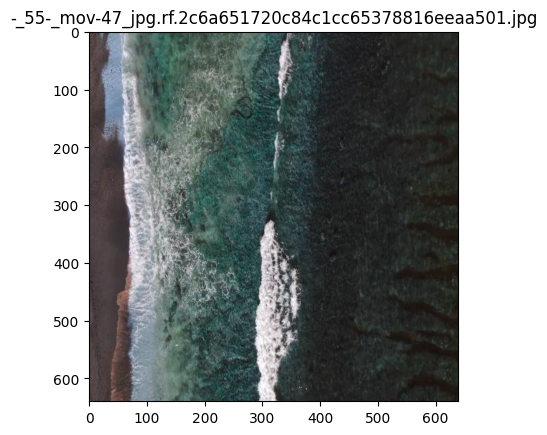

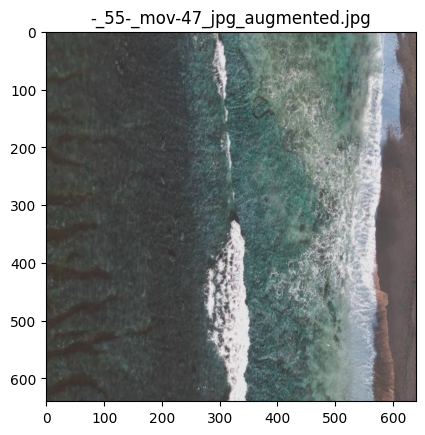

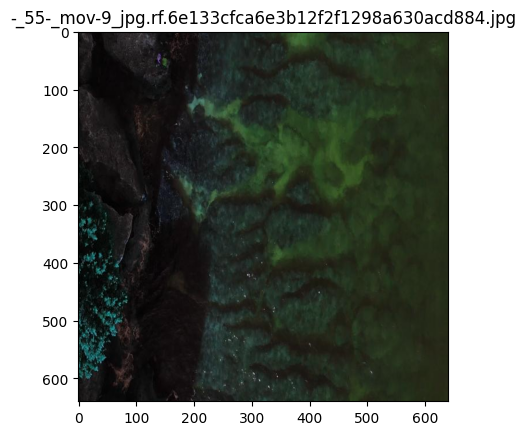

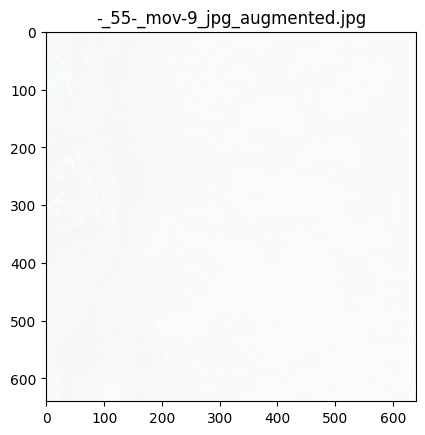

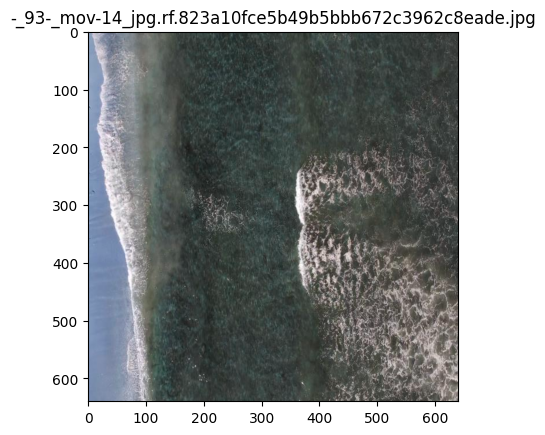

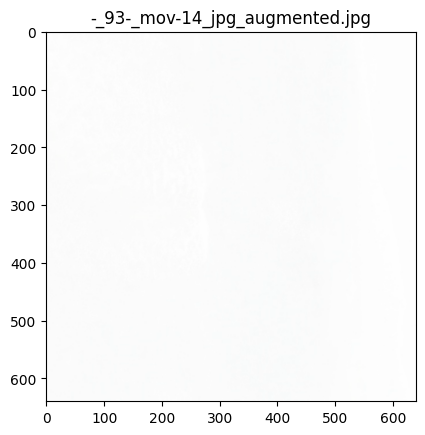

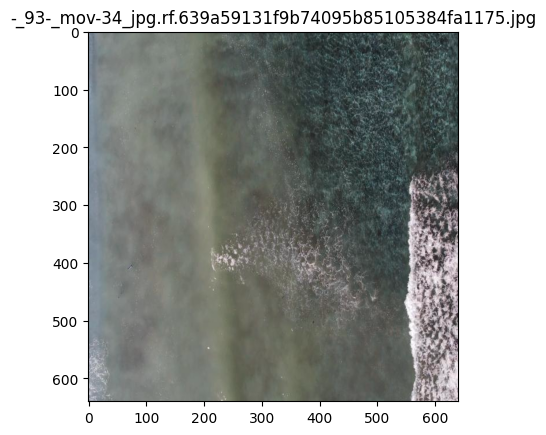

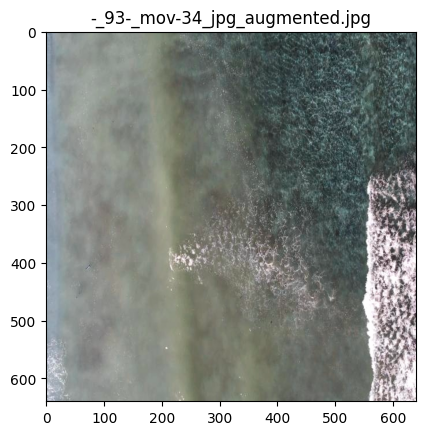

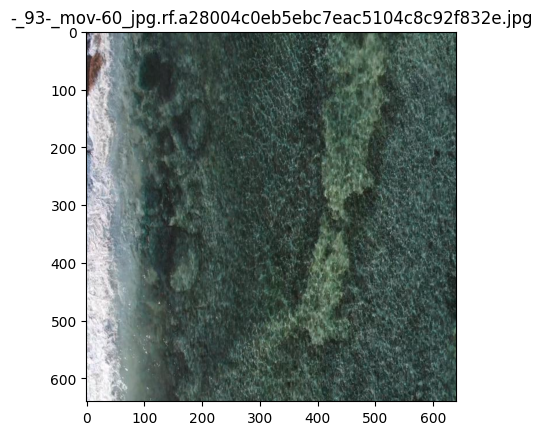

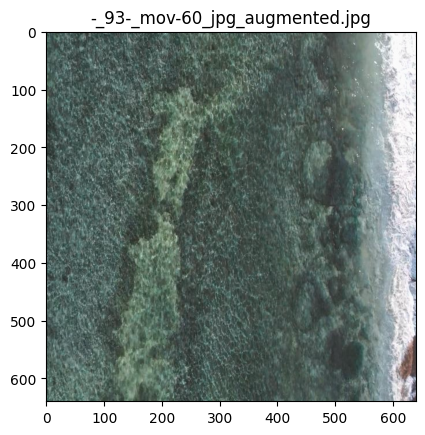

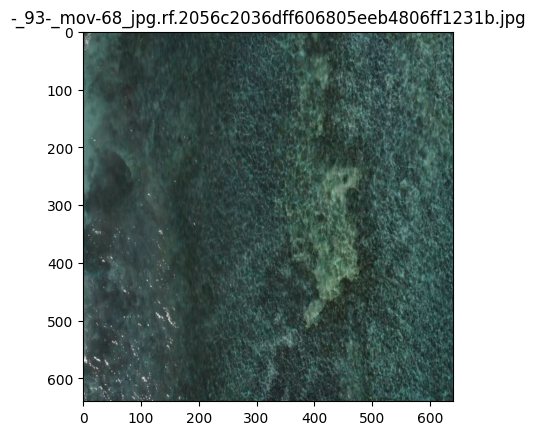

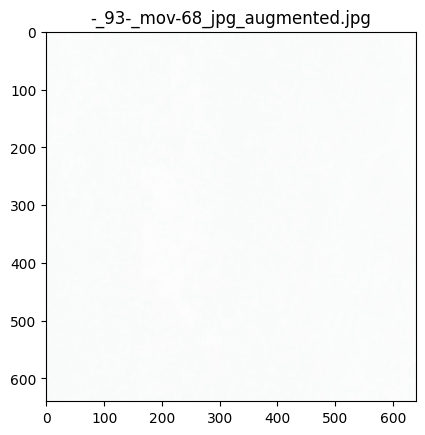

ValueError: invalid literal for int() with base 10: '0.999393310546875'

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the colors for the bounding boxes
colors = ['b', 'g', 'r', 'c', 'm']

# Load the dataset
image_dir = "./sea-turtles-1-test/all/images/"
label_dir = "./sea-turtles-1-test/all/labels/"
image_files = os.listdir(image_dir)

# Only load the first 20 images with annotations
image_files = [image_file for image_file in image_files if os.path.exists(os.path.join(label_dir, image_file.replace(".jpg", ".txt")))]
image_files = image_files[:20]

# Load each image and its corresponding labels
for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)

    label_file = image_file.replace(".jpg", ".txt")
    label_path = os.path.join(label_dir, label_file)
    with open(label_path, "r") as f:
        labels = f.read().splitlines()

    # Convert the labels from strings to lists of integers
    for i in range(len(labels)):
        labels[i] = [int(label) for label in labels[i].split()]

    # Draw a red rectangle over each bounding box
    if len(labels) > 0:
        for j, label in enumerate(labels):
            x_min, y_min, x_max, y_max = label

            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), colors[j % len(colors)], 2)

    # Show the image
    plt.imshow(image)
    plt.title(image_file)
    plt.show()
